<a href="https://colab.research.google.com/github/erbisti/Collab/blob/main/One-Class_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**One-Class SVM - Máquina de suporte com objetivo de separar oa dados outliers**

Estabelece uma fronteira de decisão que detecta um ponto de otimização entre a fronteira de decisão e a densidade populacional da amostra.

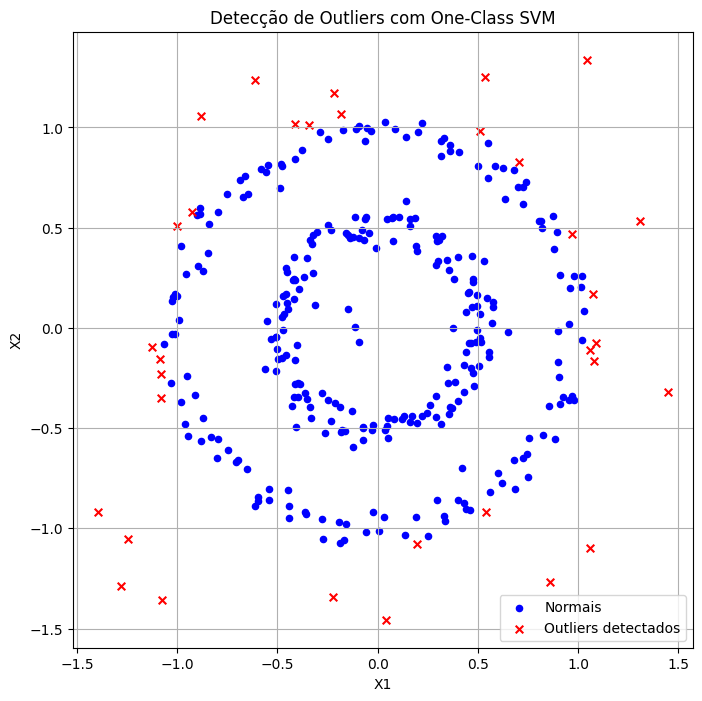

In [ ]:
# One-Class SVM para detecção de outliers em dados circulares
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_circles

# Geração de dados circulares (padrão interessante)
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=1)

# Inserção de outliers artificiais aleatórios fora da estrutura circular
X_outliers = np.random.uniform(low=-1.5, high=1.5, size=(30, 2))
X_total = np.vstack([X, X_outliers])

# Criação e ajuste do modelo One-Class SVM
# gamma controla o raio de influência dos pontos; nu define fração de outliers permitida
model = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1)
model.fit(X_total)

# Previsão para todos os pontos (1 = normal, -1 = outlier)
y_pred = model.predict(X_total)

# Separação para plot
X_inliers = X_total[y_pred == 1]
X_outliers_detected = X_total[y_pred == -1]

# Plot dos resultados
plt.figure(figsize=(8, 8))
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], c='blue', label='Normais', s=20)
plt.scatter(X_outliers_detected[:, 0], X_outliers_detected[:, 1], c='red', label='Outliers detectados', s=30, marker='x')
plt.title("Detecção de Outliers com One-Class SVM")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1: Loss = 0.4062, Accuracy = 0.8100
Epoch 2: Loss = 0.3905, Accuracy = 0.8133
Epoch 3: Loss = 0.3757, Accuracy = 0.8267
Epoch 4: Loss = 0.3619, Accuracy = 0.8333
Epoch 5: Loss = 0.3487, Accuracy = 0.8433
Epoch 6: Loss = 0.3366, Accuracy = 0.8500
Epoch 7: Loss = 0.3250, Accuracy = 0.8767
Epoch 8: Loss = 0.3143, Accuracy = 0.8800
Epoch 9: Loss = 0.3044, Accuracy = 0.9000
Epoch 10: Loss = 0.2954, Accuracy = 0.9033
Epoch 11: Loss = 0.2866, Accuracy = 0.9133
Epoch 12: Loss = 0.2789, Accuracy = 0.9133
Epoch 13: Loss = 0.2711, Accuracy = 0.9167
Epoch 14: Loss = 0.2644, Accuracy = 0.9167
Epoch 15: Loss = 0.2581, Accuracy = 0.9200
Epoch 16: Loss = 0.2523, Accuracy = 0.9200
Epoch 17: Loss = 0.2464, Accuracy = 0.9233
Epoch 18: Loss = 0.2410, Accuracy = 0.9267
Epoch 19: Loss = 0.2361, Accuracy = 0.9267
Epoch 20: Loss = 0.2309, Accuracy = 0.9300
Epoch 21: Loss = 0.2265, Accuracy = 0.9333
Epoch 22: Loss = 0.2224, Accuracy = 0.9400
Epoch 23: Loss = 0.2186, Accuracy = 0.9400
Epoch 24: Loss = 0.2

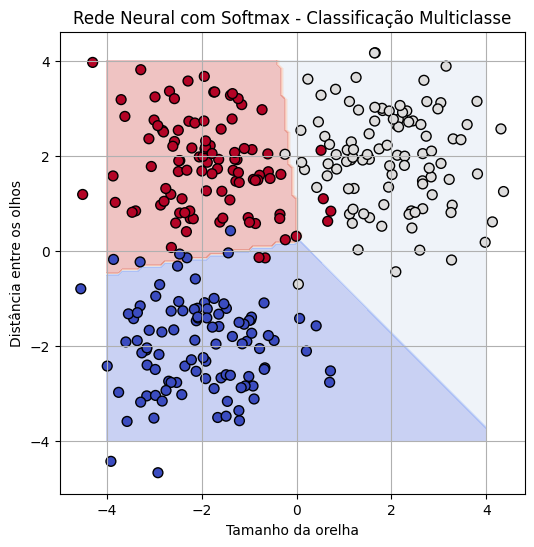

In [ ]:
# Importa bibliotecas essenciais
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelBinarizer

# Gera um conjunto de dados sintéticos com 3 agrupamentos (classes)
# Cada ponto tem 2 atributos (x1, x2) e pertence a uma das classes: 0 (gato), 1 (cachorro), 2 (coelho)
X, y = make_blobs(n_samples=300,
                  centers=[[-2, -2], [2, 2], [-2, 2]],
                  cluster_std=1.0,
                  random_state=39)

# Codifica os rótulos (0, 1, 2) no formato one-hot
# Exemplo: 0 → [1, 0, 0], 1 → [0, 1, 0], 2 → [0, 0, 1]
encoder = LabelBinarizer()
y_onehot = encoder.fit_transform(y)

# Cria uma rede neural com 1 camada densa (sem camadas ocultas)
# A camada tem 3 neurônios (um para cada classe), com ativação softmax para gerar uma distribuição de probabilidade
model = keras.Sequential([
    keras.layers.Dense(3, input_shape=(2,), activation="softmax")  # saída exclusiva
])

# Compila o modelo:
# - Otimizador: Adam
# - Função de perda: categorical_crossentropy (adequada para classificação multiclasse com softmax)
# - Métrica: acurácia
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Callback para exibir o progresso do treinamento por época
class PrintEpoch(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Accuracy = {logs['accuracy']:.4f}")

# Treina o modelo com os dados gerados, por 50 épocas
model.fit(X, y_onehot, epochs=50, verbose=0, callbacks=[PrintEpoch()])

# Cria uma grade de pontos no plano para visualizar a saída do modelo
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Previsão para cada ponto da grade → classe com maior probabilidade
Z = np.argmax(model.predict(grid_points), axis=1).reshape(xx.shape)

# Gráfico 2D com:
# - Regiões coloridas indicando as áreas de decisão
# - Pontos reais coloridos conforme suas classes verdadeiras
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", s=50)
plt.title("Rede Neural com Softmax - Classificação Multiclasse")
plt.xlabel("Tamanho da orelha")
plt.ylabel("Distância entre os olhos")
plt.grid()
plt.show()


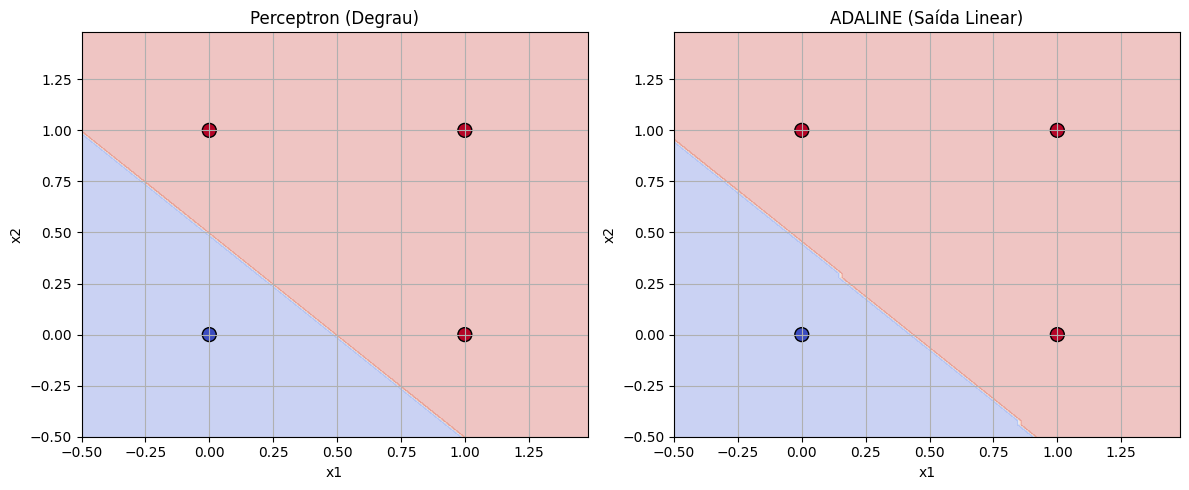

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Dados de entrada: função OR
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])  # saída da OR

# Normalização para o ADALINE (sensível à escala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Treinando o Perceptron (usa função de ativação degrau)
perceptron = Perceptron(max_iter=1000, eta0=0.1, tol=1e-3)
perceptron.fit(X, y)

# Treinando o ADALINE (usa saída linear + MSE)
# Usamos SGDClassifier com loss='squared_loss' para simular o ADALINE
adaline = SGDClassifier(loss='squared_error', learning_rate='constant', eta0=0.1, max_iter=1000, tol=1e-3)
adaline.fit(X_scaled, y)

# Função para desenhar a fronteira de decisão
def plot_decision_boundary(model, X, y, title, scaled=False):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Se necessário, aplica normalização para o ADALINE
    if scaled:
        grid = scaler.transform(grid)

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid()

# Plot Perceptron
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(perceptron, X, y, "Perceptron (Degrau)")

# Plot ADALINE
plt.subplot(1, 2, 2)
plot_decision_boundary(adaline, X, y, "ADALINE (Saída Linear)", scaled=True)

plt.tight_layout()
plt.show()


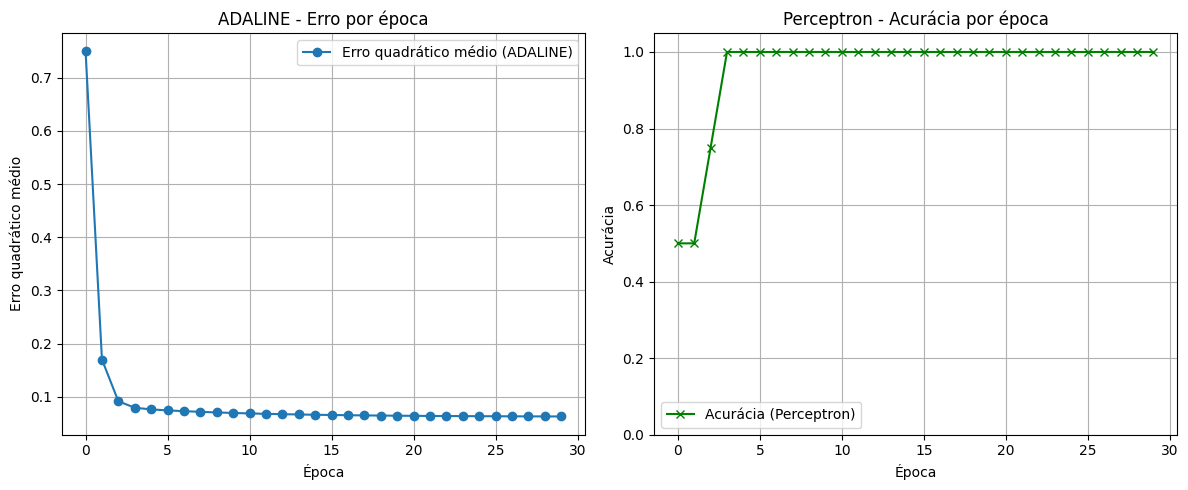

Pesos finais ADALINE: [0.28502474 0.47047168 0.47047168]
Pesos finais Perceptron: [-0.1  0.1  0.1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Dados da função lógica OR
# -----------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])  # saída desejada da OR

# -----------------------------
# Hiperparâmetros
# -----------------------------
eta = 0.1       # taxa de aprendizado
epochs = 30     # número de épocas

# Adiciona termo de bias (x0 = 1)
X_bias = np.c_[np.ones(X.shape[0]), X]

# -----------------------------
# ADALINE com registro de erro
# -----------------------------
adaline_weights = np.zeros(X_bias.shape[1])
adaline_errors = []

for _ in range(epochs):
    output = X_bias @ adaline_weights  # saída linear
    error = y - output
    adaline_weights += eta * X_bias.T @ error  # atualização dos pesos
    mse = np.mean(error ** 2)
    adaline_errors.append(mse)

# -----------------------------
# Perceptron com registro de acertos
# -----------------------------
perceptron_weights = np.zeros(X_bias.shape[1])
perceptron_accuracy = []

for _ in range(epochs):
    total_correct = 0
    for xi, target in zip(X_bias, y):
        activation = int(np.dot(xi, perceptron_weights) >= 0)
        update = eta * (target - activation)
        perceptron_weights += update * xi
        total_correct += int(activation == target)
    acc = total_correct / len(y)
    perceptron_accuracy.append(acc)

# -----------------------------
# Visualização gráfica
# -----------------------------
plt.figure(figsize=(12, 5))

# Gráfico ADALINE
plt.subplot(1, 2, 1)
plt.plot(adaline_errors, marker='o', label='Erro quadrático médio (ADALINE)')
plt.title("ADALINE - Erro por época")
plt.xlabel("Época")
plt.ylabel("Erro quadrático médio")
plt.grid(True)
plt.legend()

# Gráfico Perceptron
plt.subplot(1, 2, 2)
plt.plot(perceptron_accuracy, marker='x', color='green', label='Acurácia (Perceptron)')
plt.title("Perceptron - Acurácia por época")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------
# Pesos finais (opcional)
# -----------------------------
print("Pesos finais ADALINE:", adaline_weights)
print("Pesos finais Perceptron:", perceptron_weights)


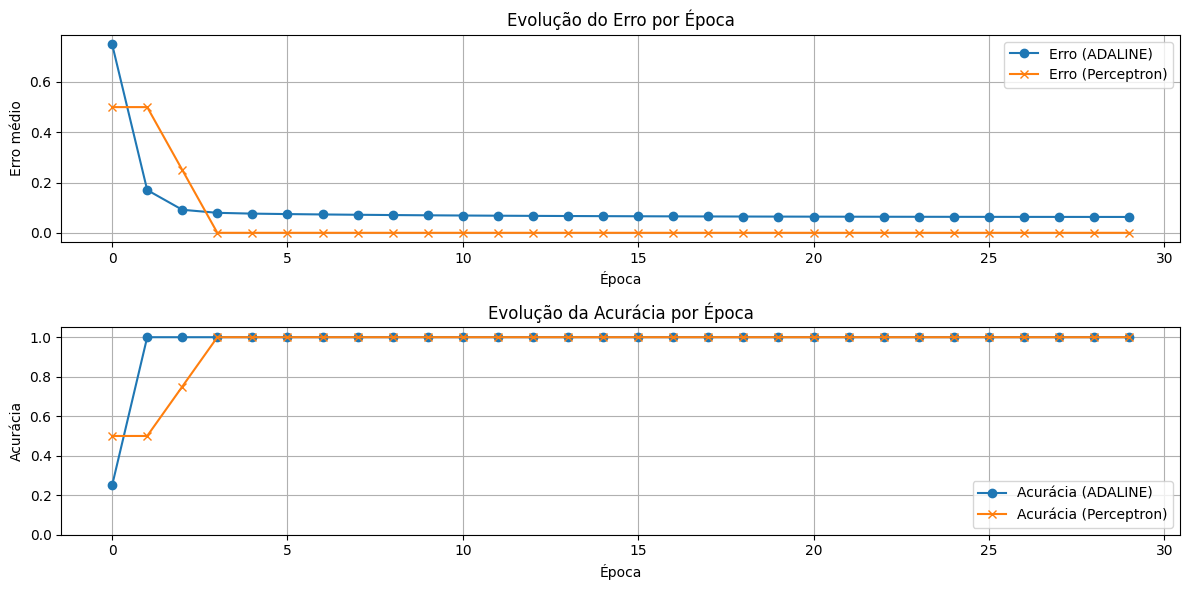

Pesos finais ADALINE: [0.28502474 0.47047168 0.47047168]
Pesos finais Perceptron: [-0.1  0.1  0.1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Dados da função lógica OR
# -----------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])  # saída desejada da OR

# -----------------------------
# Hiperparâmetros
# -----------------------------
eta = 0.1       # taxa de aprendizado
epochs = 30     # número de épocas

# Adiciona termo de bias (x0 = 1)
X_bias = np.c_[np.ones(X.shape[0]), X]

# -----------------------------
# Inicialização dos vetores de pesos e logs
# -----------------------------
adaline_weights = np.zeros(X_bias.shape[1])
adaline_errors = []
adaline_accuracies = []

perceptron_weights = np.zeros(X_bias.shape[1])
perceptron_errors = []
perceptron_accuracies = []

# -----------------------------
# Treinamento conjunto
# -----------------------------
for epoch in range(epochs):
    # --- ADALINE ---
    adaline_output = X_bias @ adaline_weights  # saída linear contínua
    adaline_error = y - adaline_output
    adaline_weights += eta * X_bias.T @ adaline_error
    adaline_mse = np.mean(adaline_error ** 2)
    adaline_pred = (adaline_output >= 0.5).astype(int)
    adaline_acc = np.mean(adaline_pred == y)
    adaline_errors.append(adaline_mse)
    adaline_accuracies.append(adaline_acc)

    # --- PERCEPTRON ---
    total_correct = 0
    total_error = 0
    for xi, target in zip(X_bias, y):
        perceptron_activation = int(np.dot(xi, perceptron_weights) >= 0)
        error = target - perceptron_activation
        perceptron_weights += eta * error * xi
        total_correct += int(perceptron_activation == target)
        total_error += error ** 2
    perceptron_acc = total_correct / len(y)
    perceptron_mse = total_error / len(y)
    perceptron_accuracies.append(perceptron_acc)
    perceptron_errors.append(perceptron_mse)

# -----------------------------
# Visualização comparativa
# -----------------------------
plt.figure(figsize=(12, 6))

# Gráfico de Erro
plt.subplot(2, 1, 1)
plt.plot(adaline_errors, label='Erro (ADALINE)', marker='o')
plt.plot(perceptron_errors, label='Erro (Perceptron)', marker='x')
plt.title("Evolução do Erro por Época")
plt.xlabel("Época")
plt.ylabel("Erro médio")
plt.legend()
plt.grid(True)

# Gráfico de Acurácia
plt.subplot(2, 1, 2)
plt.plot(adaline_accuracies, label='Acurácia (ADALINE)', marker='o')
plt.plot(perceptron_accuracies, label='Acurácia (Perceptron)', marker='x')
plt.title("Evolução da Acurácia por Época")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# -----------------------------
# Imprimir os pesos finais
# -----------------------------
print("Pesos finais ADALINE:", adaline_weights)
print("Pesos finais Perceptron:", perceptron_weights)


Época 01 | ADALINE: acc=0.25, erro=0.7500 || Perceptron: acc=0.50, erro=0.5000
Época 02 | ADALINE: acc=1.00, erro=0.1700 || Perceptron: acc=0.50, erro=0.5000
Época 03 | ADALINE: acc=1.00, erro=0.0916 || Perceptron: acc=0.75, erro=0.2500
Época 04 | ADALINE: acc=1.00, erro=0.0795 || Perceptron: acc=1.00, erro=0.0000
Época 05 | ADALINE: acc=1.00, erro=0.0763 || Perceptron: acc=1.00, erro=0.0000
Época 06 | ADALINE: acc=1.00, erro=0.0744 || Perceptron: acc=1.00, erro=0.0000
Época 07 | ADALINE: acc=1.00, erro=0.0730 || Perceptron: acc=1.00, erro=0.0000
Época 08 | ADALINE: acc=1.00, erro=0.0717 || Perceptron: acc=1.00, erro=0.0000
Época 09 | ADALINE: acc=1.00, erro=0.0706 || Perceptron: acc=1.00, erro=0.0000
Época 10 | ADALINE: acc=1.00, erro=0.0696 || Perceptron: acc=1.00, erro=0.0000
Época 11 | ADALINE: acc=1.00, erro=0.0687 || Perceptron: acc=1.00, erro=0.0000
Época 12 | ADALINE: acc=1.00, erro=0.0680 || Perceptron: acc=1.00, erro=0.0000
Época 13 | ADALINE: acc=1.00, erro=0.0673 || Percept

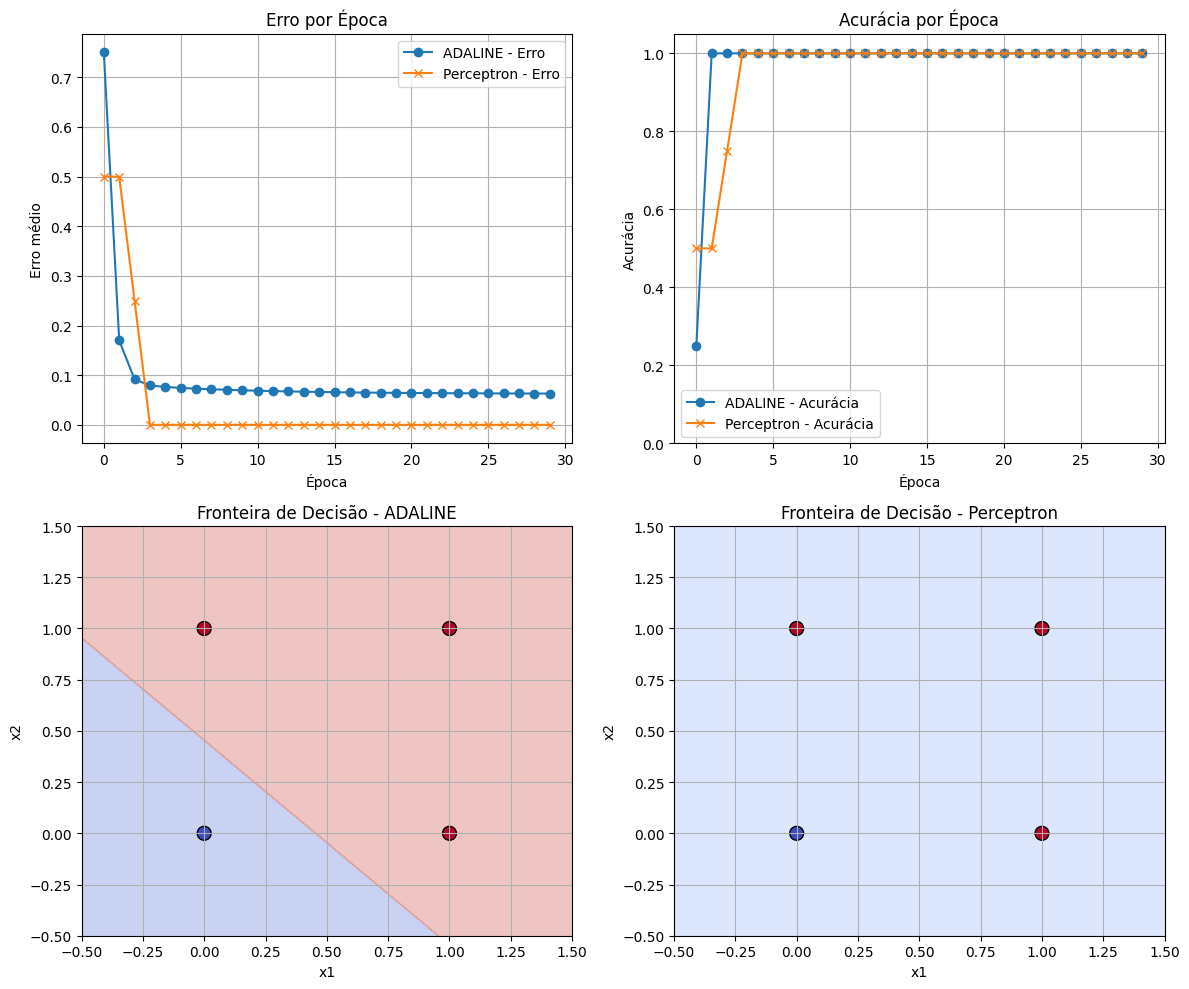


Pesos finais ADALINE: [0.28502474 0.47047168 0.47047168]
Pesos finais Perceptron: [-0.1  0.1  0.1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Dados da função lógica OR
# -----------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])  # saída desejada da OR

# -----------------------------
# Hiperparâmetros
# -----------------------------
eta = 0.1       # taxa de aprendizado
epochs = 30     # número de épocas

# Adiciona termo de bias (x0 = 1)
X_bias = np.c_[np.ones(X.shape[0]), X]

# -----------------------------
# Inicialização dos vetores de pesos e logs
# -----------------------------
adaline_weights = np.zeros(X_bias.shape[1])
adaline_errors, adaline_accuracies = [], []

perceptron_weights = np.zeros(X_bias.shape[1])
perceptron_errors, perceptron_accuracies = [], []

# -----------------------------
# Treinamento conjunto
# -----------------------------
for epoch in range(epochs):
    # --- ADALINE ---
    adaline_output = X_bias @ adaline_weights
    adaline_error = y - adaline_output
    adaline_weights += eta * X_bias.T @ adaline_error
    adaline_mse = np.mean(adaline_error ** 2)
    adaline_pred = (adaline_output >= 0.5).astype(int)
    adaline_acc = np.mean(adaline_pred == y)
    adaline_errors.append(adaline_mse)
    adaline_accuracies.append(adaline_acc)

    # --- PERCEPTRON ---
    correct = 0
    sum_squared_err = 0
    for xi, target in zip(X_bias, y):
        activation = int(np.dot(xi, perceptron_weights) >= 0)
        delta = target - activation
        perceptron_weights += eta * delta * xi
        correct += int(activation == target)
        sum_squared_err += delta ** 2
    perceptron_acc = correct / len(y)
    perceptron_mse = sum_squared_err / len(y)
    perceptron_accuracies.append(perceptron_acc)
    perceptron_errors.append(perceptron_mse)

    # --- LOG EPOCAL ---
    print(f"Época {epoch+1:02d} | ADALINE: acc={adaline_acc:.2f}, erro={adaline_mse:.4f} || "
          f"Perceptron: acc={perceptron_acc:.2f}, erro={perceptron_mse:.4f}")

# -----------------------------
# Função de visualização das fronteiras
# -----------------------------
def plot_decision_boundary(weights, title, ax):
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))
    grid = np.c_[np.ones(xx.size), xx.ravel(), yy.ravel()]
    zz = grid @ weights
    zz = (zz >= 0.5).astype(int).reshape(xx.shape)
    ax.contourf(xx, yy, zz, alpha=0.3, cmap="coolwarm")
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors='k', s=100)
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.grid(True)

# -----------------------------
# Visualização comparativa
# -----------------------------
plt.figure(figsize=(12, 10))

# Erros
plt.subplot(2, 2, 1)
plt.plot(adaline_errors, label='ADALINE - Erro', marker='o')
plt.plot(perceptron_errors, label='Perceptron - Erro', marker='x')
plt.title("Erro por Época")
plt.xlabel("Época")
plt.ylabel("Erro médio")
plt.legend()
plt.grid(True)

# Acurácias
plt.subplot(2, 2, 2)
plt.plot(adaline_accuracies, label='ADALINE - Acurácia', marker='o')
plt.plot(perceptron_accuracies, label='Perceptron - Acurácia', marker='x')
plt.title("Acurácia por Época")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)

# Fronteira de Decisão - ADALINE
ax1 = plt.subplot(2, 2, 3)
plot_decision_boundary(adaline_weights, "Fronteira de Decisão - ADALINE", ax1)

# Fronteira de Decisão - Perceptron
ax2 = plt.subplot(2, 2, 4)
plot_decision_boundary(perceptron_weights, "Fronteira de Decisão - Perceptron", ax2)

plt.tight_layout()
plt.show()

# -----------------------------
# Pesos finais
# -----------------------------
print("\nPesos finais ADALINE:", adaline_weights)
print("Pesos finais Perceptron:", perceptron_weights)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Acurácia Random Forest: 0.6500
Acurácia SVM:           0.6767
Acurácia MLP (Keras):   0.7100


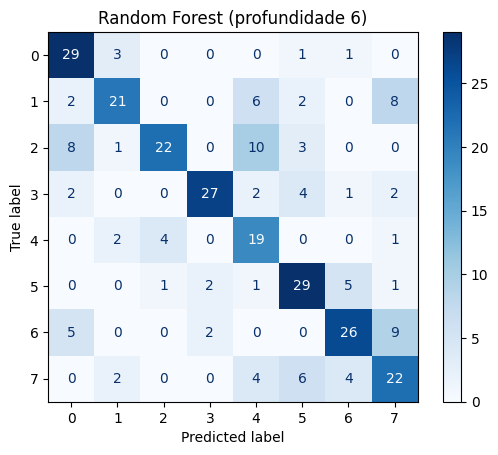

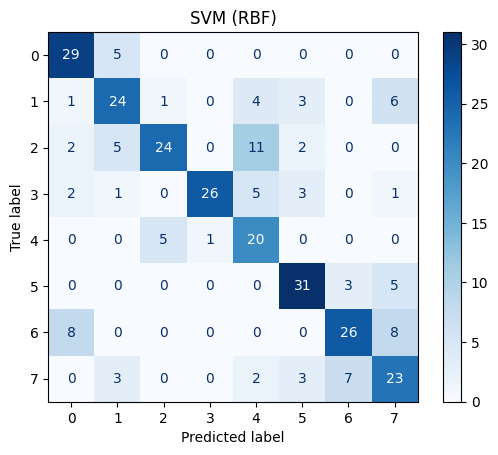

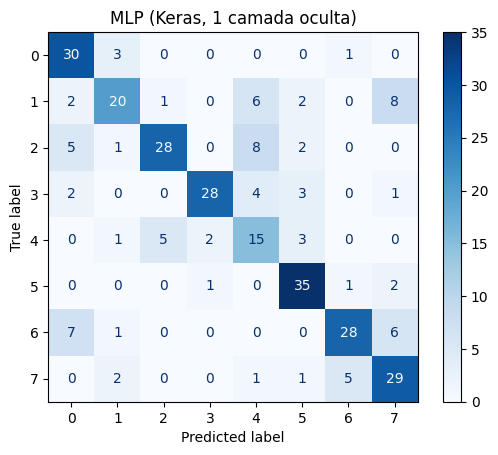

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1. Geração do dataset com 8 classes
X, y = make_classification(
    n_samples=1000,
    n_features=8,
    n_informative=4,
    n_redundant=0,
    n_classes=8,
    n_clusters_per_class=1,
    random_state=42
)

# 2. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Modelos

# Random Forest
rf = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=2)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)

# SVM
svm = SVC(kernel='rbf', decision_function_shape='ovr', random_state=2)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)

# MLP com Keras
y_train_cat = to_categorical(y_train, num_classes=8)
y_test_cat = to_categorical(y_test, num_classes=8)

model = Sequential([
    Dense(30, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_cat, epochs=50, batch_size=32, verbose=0)

mlp_probs = model.predict(X_test_scaled)
mlp_pred = np.argmax(mlp_probs, axis=1)
mlp_acc = accuracy_score(y_test, mlp_pred)

# 5. Resultados
print(f"Acurácia Random Forest: {rf_acc:.4f}")
print(f"Acurácia SVM:           {svm_acc:.4f}")
print(f"Acurácia MLP (Keras):   {mlp_acc:.4f}")

# 6. Matrizes de confusão
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(title)
    plt.show()

plot_confusion(y_test, rf_pred, "Random Forest (profundidade 6)")
plot_confusion(y_test, svm_pred, "SVM (RBF)")
plot_confusion(y_test, mlp_pred, "MLP (Keras, 1 camada oculta)")


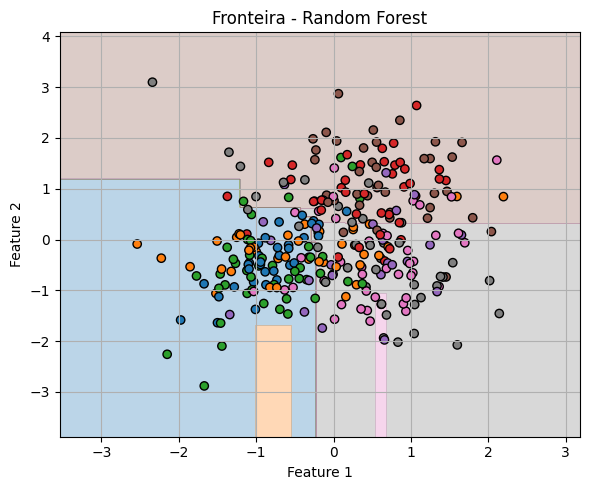

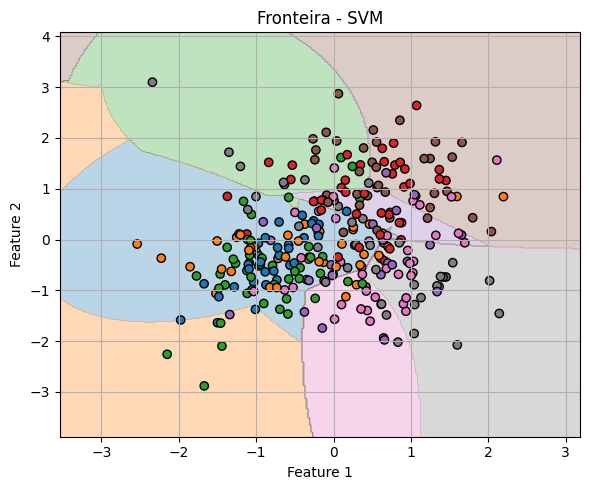

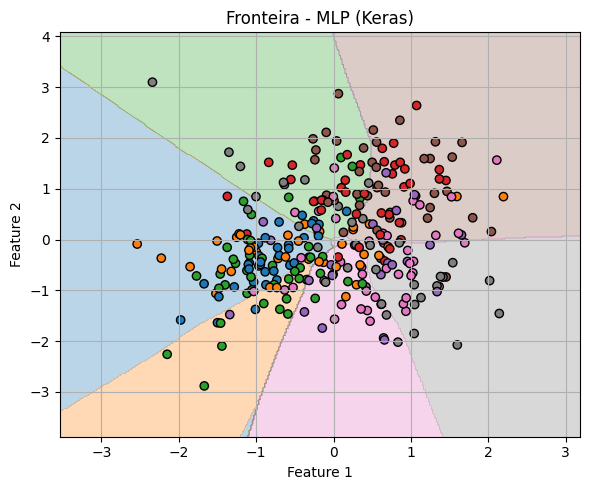

In [ ]:

# 7. Plotar fronteiras de decisão (usando apenas as 2 primeiras variáveis padronizadas para visualização)
from matplotlib.colors import ListedColormap

def plot_decision_boundary_2d(model, X, y, title, is_keras=False):
    # Apenas as duas primeiras features
    X_vis = X[:, :2]

    # Geração da malha
    h = 0.02
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # Expandir para o tamanho original se necessário (com zeros nas dimensões faltantes)
    X_full = np.zeros((X_grid.shape[0], X.shape[1]))
    X_full[:, :2] = X_grid

    # Predição
    if is_keras:
        Z = np.argmax(model.predict(X_full, verbose=0), axis=1)
    else:
        Z = model.predict(X_full)

    Z = Z.reshape(xx.shape)

    # Plot
    cmap = ListedColormap(plt.cm.tab10.colors[:len(np.unique(y))])
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=cmap, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Gerar gráficos de fronteiras
plot_decision_boundary_2d(rf, X_test_scaled, y_test, "Fronteira - Random Forest")
plot_decision_boundary_2d(svm, X_test_scaled, y_test, "Fronteira - SVM")
plot_decision_boundary_2d(model, X_test_scaled, y_test, "Fronteira - MLP (Keras)", is_keras=True)


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score

# Dados fictícios: prever se houve compra, baseado na cor favorita (variável categórica nominal)
data = pd.DataFrame({
    'cor': ['vermelho', 'azul', 'verde', 'vermelho', 'azul', 'verde', 'azul', 'vermelho', 'verde', 'azul'],
    'compra': [1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
})

X = data[['cor']]
y = data['compra']

# CODIFICAÇÃO INCORRETA: Label Encoding impõe ordem numérica artificial
le = LabelEncoder()
X_label_encoded = X.copy()
X_label_encoded['cor'] = le.fit_transform(X['cor'])  # Ex: azul=0, verde=1, vermelho=2

# CODIFICAÇÃO CORRETA: One-Hot Encoding cria variáveis binárias independentes
ohe = OneHotEncoder(sparse=False)
X_ohe_encoded = pd.DataFrame(ohe.fit_transform(X), columns=ohe.get_feature_names_out(['cor']))

# Separar treino e teste
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_label_encoded, y, test_size=0.3, random_state=2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_ohe_encoded, y, test_size=0.3, random_state=2)

# Modelo 1: usando codificação incorreta
model_wrong = LogisticRegression()
model_wrong.fit(X_train1, y_train1)
y_pred_wrong = model_wrong.predict(X_test1)

# Modelo 2: usando codificação correta
model_right = LogisticRegression()
model_right.fit(X_train2, y_train2)
y_pred_right = model_right.predict(X_test2)

# Avaliar acurácia
acc_wrong = accuracy_score(y_test1, y_pred_wrong)
acc_right = accuracy_score(y_test2, y_pred_right)

print("Acurácia com codificação incorreta (Label Encoding):", round(acc_wrong, 4))
print("Acurácia com codificação correta (One-Hot Encoding):", round(acc_right, 4))


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score

# Verificar versão do scikit-learn para garantir compatibilidade
sk_version = tuple(map(int, sklearn.__version__.split('.')[:2]))
use_sparse_param = sk_version < (1, 2)

# Dados fictícios
data = pd.DataFrame({
    'cor': ['vermelho', 'azul', 'verde', 'vermelho', 'azul', 'verde', 'azul', 'vermelho', 'verde', 'azul'],
    'compra': [1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
})

X = data[['cor']]
y = data['compra']

# Codificação incorreta: Label Encoding (impõe ordem artificial)
le = LabelEncoder()
X_label_encoded = X.copy()
X_label_encoded['cor'] = le.fit_transform(X['cor'])

# Codificação correta: One-Hot Encoding
if use_sparse_param:
    ohe = OneHotEncoder(sparse=False)
else:
    ohe = OneHotEncoder(sparse_output=False)

X_ohe_encoded = pd.DataFrame(ohe.fit_transform(X), columns=ohe.get_feature_names_out(['cor']))

# Separação dos dados
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_label_encoded, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_ohe_encoded, y, test_size=0.3, random_state=42)

# Modelo com Label Encoding (errado)
model_wrong = LogisticRegression()
model_wrong.fit(X_train1, y_train1)
y_pred_wrong = model_wrong.predict(X_test1)

# Modelo com One-Hot Encoding (certo)
model_right = LogisticRegression()
model_right.fit(X_train2, y_train2)
y_pred_right = model_right.predict(X_test2)

# Avaliação
acc_wrong = accuracy_score(y_test1, y_pred_wrong)
acc_right = accuracy_score(y_test2, y_pred_right)

print("Acurácia com codificação incorreta (Label Encoding):", round(acc_wrong, 4))
print("Acurácia com codificação correta (One-Hot Encoding):", round(acc_right, 4))


Acurácia com codificação incorreta (Label Encoding): 0.6667
Acurácia com codificação correta (One-Hot Encoding): 0.6667


In [ ]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
import sklearn

# Verificar versão do scikit-learn
sk_version = tuple(map(int, sklearn.__version__.split('.')[:2]))
use_sparse_param = sk_version < (1, 2)

# 1. Gerar dataset maior com uma variável categórica nominal sem ordem
np.random.seed(42)
cores = ['vermelho', 'azul', 'verde', 'amarelo', 'preto']
n = 1000
X_raw = np.random.choice(cores, size=n)
# Criar uma regra artificial não linear
y_raw = np.array([1 if cor in ['vermelho', 'amarelo'] else 0 for cor in X_raw])

data = pd.DataFrame({'cor': X_raw, 'compra': y_raw})
X = data[['cor']]
y = data['compra']

# 2. Codificação incorreta: Label Encoding (impõe ordem artificial)
le = LabelEncoder()
X_label_encoded = X.copy()
X_label_encoded['cor'] = le.fit_transform(X['cor'])

# 3. Codificação correta: One-Hot Encoding
if use_sparse_param:
    ohe = OneHotEncoder(sparse=False)
else:
    ohe = OneHotEncoder(sparse_output=False)

X_ohe_encoded = pd.DataFrame(ohe.fit_transform(X), columns=ohe.get_feature_names_out(['cor']))

# 4. Dividir dados
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_label_encoded, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_ohe_encoded, y, test_size=0.3, random_state=42)

# 5. Modelos
model_wrong = LogisticRegression()
model_wrong.fit(X_train1, y_train1)
y_pred_wrong = model_wrong.predict(X_test1)

model_right = LogisticRegression()
model_right.fit(X_train2, y_train2)
y_pred_right = model_right.predict(X_test2)

# 6. Acurácias
acc_wrong = accuracy_score(y_test1, y_pred_wrong)
acc_right = accuracy_score(y_test2, y_pred_right)

print("Acurácia com Label Encoding (incorreto):", round(acc_wrong, 4))
print("Acurácia com One-Hot Encoding (correto):", round(acc_right, 4))


Acurácia com Label Encoding (incorreto): 0.5833
Acurácia com One-Hot Encoding (correto): 1.0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Acurácia Random Forest: 0.6500
Acurácia SVM:           0.6767
Acurácia MLP (Keras):   0.7033


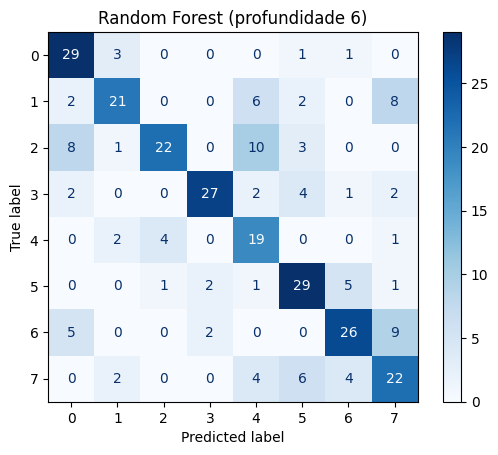

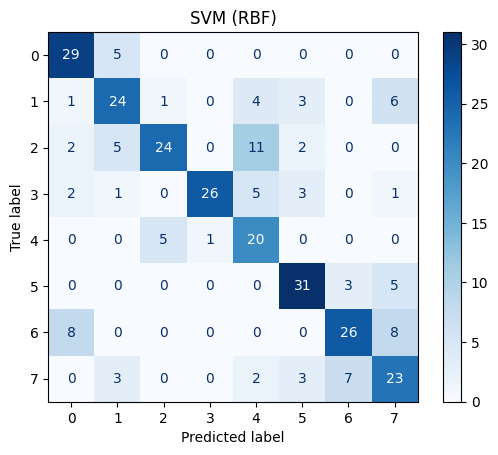

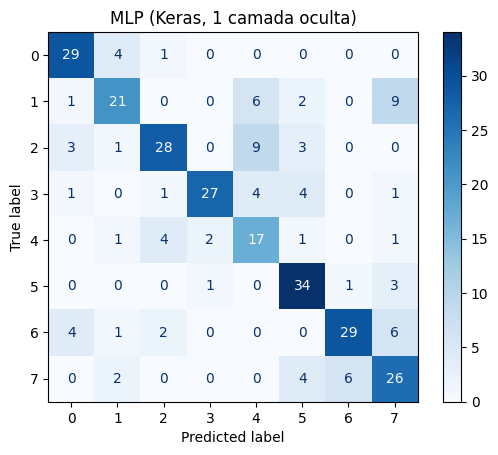

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1. Geração do dataset com 8 classes
X, y = make_classification(
    n_samples=1000,
    n_features=8,
    n_informative=4,
    n_redundant=0,
    n_classes=8,
    n_clusters_per_class=1,
    random_state=42
)

# 2. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Modelos

# Random Forest
rf = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)

# SVM
svm = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)

# MLP com Keras
y_train_cat = to_categorical(y_train, num_classes=8)
y_test_cat = to_categorical(y_test, num_classes=8)

model = Sequential([
    Dense(30, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_cat, epochs=50, batch_size=32, verbose=0)

mlp_probs = model.predict(X_test_scaled)
mlp_pred = np.argmax(mlp_probs, axis=1)
mlp_acc = accuracy_score(y_test, mlp_pred)

# 5. Resultados
print(f"Acurácia Random Forest: {rf_acc:.4f}")
print(f"Acurácia SVM:           {svm_acc:.4f}")
print(f"Acurácia MLP (Keras):   {mlp_acc:.4f}")

# 6. Matrizes de confusão
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(title)
    plt.show()

plot_confusion(y_test, rf_pred, "Random Forest (profundidade 6)")
plot_confusion(y_test, svm_pred, "SVM (RBF)")
plot_confusion(y_test, mlp_pred, "MLP (Keras, 1 camada oculta)")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Acurácia Random Forest: 0.6500
Acurácia SVM:           0.6767
Acurácia MLP (Keras):   0.7133


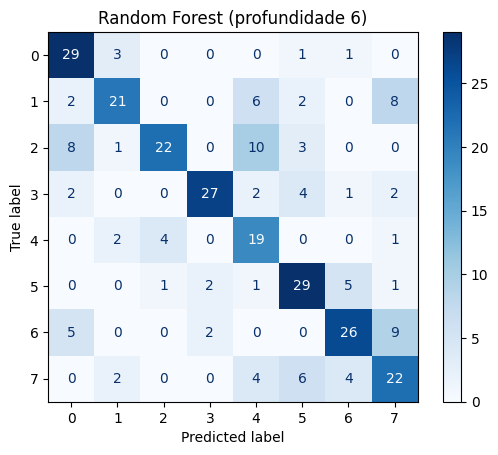

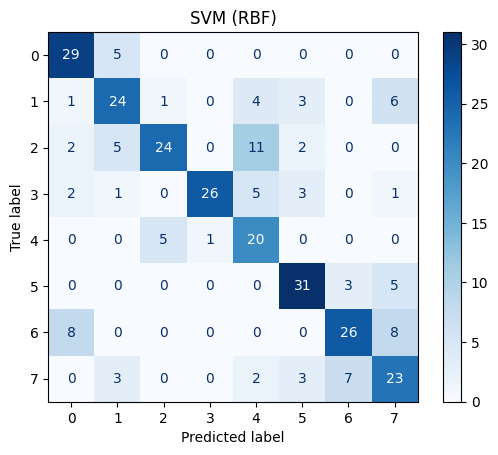

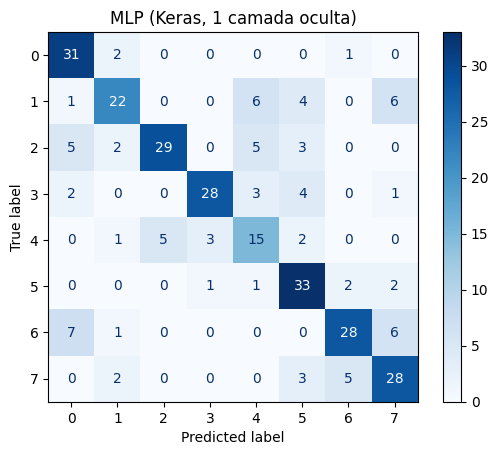

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# 1. Geração do dataset com 8 classes e 8 features
X, y = make_classification(
    n_samples=1000,
    n_features=8,
    n_informative=4,  # 4 variáveis realmente úteis para classificar
    n_redundant=0,    # nenhuma variável redundante
    n_classes=8,
    n_clusters_per_class=1,
    random_state=42
)

# 2. Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Padronização dos dados para melhorar a performance dos modelos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Treinamento dos modelos

# Random Forest com 10 árvores de profundidade máxima 6
rf = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)

# Suporte Vector Machine com kernel RBF
svm = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)

# MLP com Keras (1 camada oculta com 30 neurônios e ativação ReLU)
# Corrige o warning utilizando camada Input() explicitamente
y_train_cat = to_categorical(y_train, num_classes=8)
y_test_cat = to_categorical(y_test, num_classes=8)

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # define forma de entrada corretamente
    Dense(30, activation='relu'),
    Dense(8, activation='softmax')  # saída com 8 classes
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_cat, epochs=50, batch_size=32, verbose=0)

# Geração de predições e cálculo da acurácia
mlp_probs = model.predict(X_test_scaled)
mlp_pred = np.argmax(mlp_probs, axis=1)
mlp_acc = accuracy_score(y_test, mlp_pred)

# 5. Resultados de acurácia
print(f"Acurácia Random Forest: {rf_acc:.4f}")
print(f"Acurácia SVM:           {svm_acc:.4f}")
print(f"Acurácia MLP (Keras):   {mlp_acc:.4f}")

# 6. Visualização das matrizes de confusão
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(title)
    plt.show()

plot_confusion(y_test, rf_pred, "Random Forest (profundidade 6)")
plot_confusion(y_test, svm_pred, "SVM (RBF)")
plot_confusion(y_test, mlp_pred, "MLP (Keras, 1 camada oculta)")


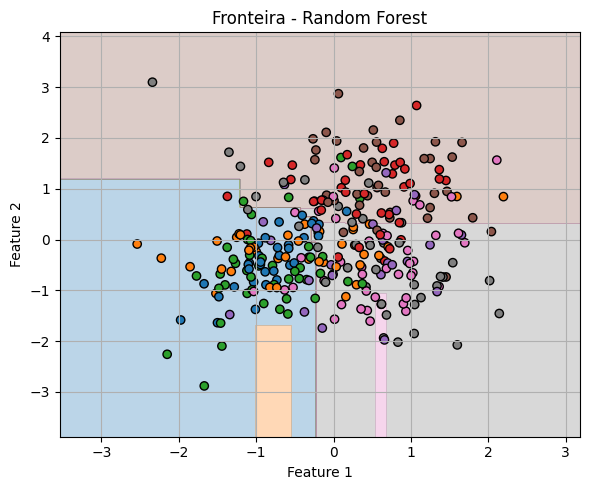

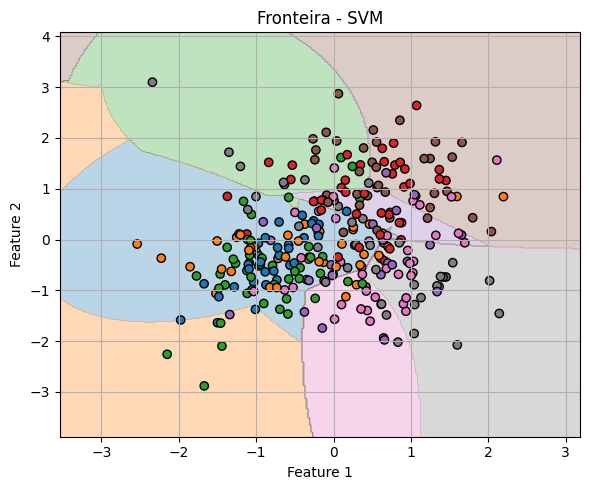

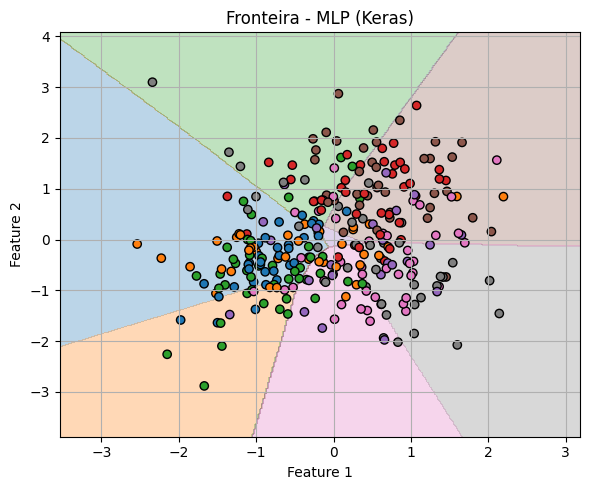

In [ ]:

# 7. Plotar fronteiras de decisão (usando apenas as 2 primeiras variáveis padronizadas para visualização)
from matplotlib.colors import ListedColormap

def plot_decision_boundary_2d(model, X, y, title, is_keras=False):
    # Apenas as duas primeiras features
    X_vis = X[:, :2]

    # Geração da malha
    h = 0.02
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # Expandir para o tamanho original se necessário (com zeros nas dimensões faltantes)
    X_full = np.zeros((X_grid.shape[0], X.shape[1]))
    X_full[:, :2] = X_grid

    # Predição
    if is_keras:
        Z = np.argmax(model.predict(X_full, verbose=0), axis=1)
    else:
        Z = model.predict(X_full)

    Z = Z.reshape(xx.shape)

    # Plot
    cmap = ListedColormap(plt.cm.tab10.colors[:len(np.unique(y))])
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap=cmap, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Gerar gráficos de fronteiras
plot_decision_boundary_2d(rf, X_test_scaled, y_test, "Fronteira - Random Forest")
plot_decision_boundary_2d(svm, X_test_scaled, y_test, "Fronteira - SVM")
plot_decision_boundary_2d(model, X_test_scaled, y_test, "Fronteira - MLP (Keras)", is_keras=True)


In [ ]:
import tensorflow as tf
import numpy as np

y_true = np.array([[0, 1, 0], [0, 0, 1]])
y_pred_good = np.array([[0.1, 0.8, 0.1], [0.05, 0.05, 0.9]])
y_pred_bad = np.array([[0.7, 0.2, 0.1], [0.4, 0.4, 0.2]])

loss_fn = tf.keras.losses.CategoricalCrossentropy()

print("Boa predição:", loss_fn(y_true, y_pred_good).numpy())
print("Má predição :", loss_fn(y_true, y_pred_bad).numpy())


Boa predição: 0.16425204
Má predição : 1.609438


In [ ]:
import numpy as np
import tensorflow as tf

# Pesos dos perceptrons
p1 = np.array([0.5, -1.0])
p2 = np.array([-0.5, 0.5])
x = np.array([1.0, 1.0])
y_true = np.array([1.0, 0.0])  # saída esperada (one-hot)

# Cálculo dos logits
z1 = np.dot(p1, x)
z2 = np.dot(p2, x)
logits = np.array([z1, z2])

# Aplicar softmax
y_pred = tf.nn.softmax(logits).numpy()

print("Logits (valores antes da ativação):", logits)
print("Softmax:", y_pred)

# MAE
mae = tf.keras.losses.MeanAbsoluteError()(y_true, y_pred).numpy()

# MSE
mse = tf.keras.losses.MeanSquaredError()(y_true, y_pred).numpy()



# Cross-Entropy genérica (manual)
ce_manual = -np.sum(y_true * np.log(y_pred + 1e-12))

# Resultados
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"Cross-Entropy Genérica (manual): {ce_manual:.4f}")


Logits (valores antes da ativação): [-0.5  0. ]
Softmax: [0.37754067 0.62245933]
MAE: 0.6225
MSE: 0.3875
Categorical Cross-Entropy (Keras): 0.9741
Cross-Entropy Genérica (manual): 0.9741


In [ ]:
# Exemplo de MLP com 2 entradas, 2 neurônios ocultos, 2 saídas com softmax
# Atualização com SGD, Momentum e RMSprop

import numpy as np

# Entrada e saída esperada (one-hot)
X = np.array([[1.0], [1.0]])
Y_true = np.array([[1.0], [0.0]])

# Pesos iniciais (cada linha = perceptron)
W1 = np.array([[0.1, 0.3],   # p1
               [0.2, 0.4]])  # p2

W2 = np.array([[0.5, 0.7],   # p3
               [0.6, 0.8]])  # p4

# Passo 1: forward
Z1 = W1 @ X
H = np.maximum(0, Z1)  # ReLU
Z2 = W2 @ H

def softmax(z):
    e_z = np.exp(z - np.max(z))
    return e_z / np.sum(e_z)

Y_pred = softmax(Z2)

# Loss: Categorical cross-entropy
loss = -np.sum(Y_true * np.log(Y_pred))

# Gradiente da saída
D_out = Y_pred - Y_true  # (2x1)

# Gradiente W2: D_out @ H.T
grad_W2 = D_out @ H.T

# Backprop para oculta
W2_T = W2.T
D_hidden = (W2_T @ D_out) * (Z1 > 0)  # ReLU'
grad_W1 = D_hidden @ X.T

# Otimizadores
eta = 0.1

# SGD
W1_sgd = W1 - eta * grad_W1
W2_sgd = W2 - eta * grad_W2

# RMSprop
beta = 0.9
epsilon = 1e-8

s_W1 = (1 - beta) * (grad_W1 ** 2)
s_W2 = (1 - beta) * (grad_W2 ** 2)

W1_rms = W1 - (eta / (np.sqrt(s_W1 + epsilon))) * grad_W1
W2_rms = W2 - (eta / (np.sqrt(s_W2 + epsilon))) * grad_W2

# Exibir resultados
print("\nSaída Y_pred (softmax):\n", Y_pred)
print("\nLoss (CCE):", loss)

print("\nGradiente W1:\n", grad_W1)
print("\nGradiente W2:\n", grad_W2)

print("\n--- Atualização SGD ---")
print("W1_sgd:\n", W1_sgd)
print("W2_sgd:\n", W2_sgd)

print("\n--- Atualização RMSprop ---")
print("W1_rms:\n", W1_rms)
print("W2_rms:\n", W2_rms)



Saída Y_pred (softmax):
 [[0.47502081]
 [0.52497919]]

Loss (CCE): 0.744396660073571

Gradiente W1:
 [[0.05249792 0.05249792]
 [0.05249792 0.05249792]]

Gradiente W2:
 [[-0.20999167 -0.31498751]
 [ 0.20999167  0.31498751]]

--- Atualização SGD ---
W1_sgd:
 [[0.09475021 0.29475021]
 [0.19475021 0.39475021]]
W2_sgd:
 [[0.52099917 0.73149875]
 [0.57900083 0.76850125]]

--- Atualização RMSprop ---
W1_rms:
 [[-0.21622203 -0.01622203]
 [-0.11622203  0.08377797]]
W2_rms:
 [[0.81622741 1.01622761]
 [0.28377259 0.48377239]]


In [ ]:
# Exemplo de MLP com 2 entradas, 2 neurônios ocultos, 2 saídas com softmax
# Atualização com SGD, Momentum e RMSprop

import numpy as np

# Entrada e saída esperada (one-hot)
X = np.array([[1.0], [1.0]])
Y_true = np.array([[1.0], [0.0]])

# Pesos iniciais (cada linha = perceptron)
W1 = np.array([[0.1, 0.3],   # p1
               [0.2, 0.4]])  # p2

W2 = np.array([[0.5, 0.7],   # p3
               [0.6, 0.8]])  # p4

# Passo 1: forward
Z1 = W1 @ X
H = np.maximum(0, Z1)  # ReLU
Z2 = W2 @ H

def softmax(z):
    e_z = np.exp(z - np.max(z))
    return e_z / np.sum(e_z)

Y_pred = softmax(Z2)

# Loss: Categorical cross-entropy
loss = -np.sum(Y_true * np.log(Y_pred))

# Gradiente da saída
D_out = Y_pred - Y_true  # (2x1)

# Gradiente W2: D_out @ H.T
grad_W2 = D_out @ H.T

# Backprop para oculta
W2_T = W2.T
D_hidden = (W2_T @ D_out) * (Z1 > 0)  # ReLU'
grad_W1 = D_hidden @ X.T

# Otimizadores
eta = 0.1

# SGD
W1_sgd = W1 - eta * grad_W1
W2_sgd = W2 - eta * grad_W2

# RMSprop
beta = 0.9
epsilon = 1e-8

s_W1 = (1 - beta) * (grad_W1 ** 2)
s_W2 = (1 - beta) * (grad_W2 ** 2)

W1_rms = W1 - (eta / (np.sqrt(s_W1 + epsilon))) * grad_W1
W2_rms = W2 - (eta / (np.sqrt(s_W2 + epsilon))) * grad_W2

# Exibir resultados
print("\nSaída Y_pred (softmax):\n", Y_pred)
print("\nLoss (CCE):", loss)

print("\nGradiente W1:\n", grad_W1)
print("\nGradiente W2:\n", grad_W2)

print("\n--- Atualização SGD ---")
print("W1_sgd:\n", W1_sgd)
print("W2_sgd:\n", W2_sgd)

print("\n--- Atualização RMSprop ---")
print("W1_rms:\n", W1_rms)
print("W2_rms:\n", W2_rms)



Saída Y_pred (softmax):
 [[0.47502081]
 [0.52497919]]

Loss (CCE): 0.744396660073571

Gradiente W1:
 [[0.05249792 0.05249792]
 [0.05249792 0.05249792]]

Gradiente W2:
 [[-0.20999167 -0.31498751]
 [ 0.20999167  0.31498751]]

--- Atualização SGD ---
W1_sgd:
 [[0.09475021 0.29475021]
 [0.19475021 0.39475021]]
W2_sgd:
 [[0.52099917 0.73149875]
 [0.57900083 0.76850125]]

--- Atualização RMSprop ---
W1_rms:
 [[-0.21622203 -0.01622203]
 [-0.11622203  0.08377797]]
W2_rms:
 [[0.81622741 1.01622761]
 [0.28377259 0.48377239]]
